In [3]:
#pip install spotipy --upgrade              # Uncomment this and run it if you haven't installed spotipy before


In [264]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re, glob
import os, sys
import spotipy
from scipy import stats

from spotipy.oauth2 import SpotifyClientCredentials
# Import Keys
from config import ckey
from config import skey

In [2]:
# Setting up Spotify API info
client_credentials_manager = SpotifyClientCredentials(client_id=ckey, client_secret=skey)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [275]:
# Create dataframe from weekly chart data
#2019_csv_list = []

path = r"Resources/spotify_new_zealand/*.csv"                    # The path requires "".csv" at end of file name. 
                                                                 # This is to prevent the program from blowing up
                                                                 # when it hits some kind of hidden file. 

nz_df = pd.read_csv(glob.glob(path)[0], header=1)      # Sets up main dataframe with data from first file
string = str(glob.glob(path)[0])                                 # in the folder
year_month, = re.findall(r"ly-(\d\d\d\d)-(\d\d)-\d\d", string)
nz_df[['Year']] = year_month[0]
nz_df[['Month']] = year_month[1]



for file in glob.glob(path)[1:]:                           # Iterates through remaining files
        temp_df = pd.read_csv(file, header=1)
        string = str(file)
        year_month, = re.findall(r"ly-(\d\d\d\d)-(\d\d)-\d\d", string)
        #print (year_month)
        temp_df[['Year']] = year_month[0]
        temp_df[['Month']] = year_month[1]
        nz_df = pd.concat([nz_df, temp_df])                # Adds temperary datafame to end of main dataframe


nz_df = nz_df.sort_values(['Year','Month'])

nz_df


#nz_df.to_csv("nz.csv", index=True)

,Position,Track Name,Artist,Streams,URL,Year,Month
0,1,7 rings,Ariana Grande,562985,https://open.spotify.com/track/14msK75pk3pA33p...,2019,01
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,389293,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019,01
2,3,Wow.,Post Malone,345858,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019,01
3,4,Without Me,Halsey,280760,https://open.spotify.com/track/5p7ujcrUXASCNwR...,2019,01
4,5,Sweet but Psycho,Ava Max,276126,https://open.spotify.com/track/25sgk305KZfyuqV...,2019,01
...,...,...,...,...,...,...,...
195,196,goosebumps,Travis Scott,51789,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2020,12
196,197,Thinking out Loud,Ed Sheeran,51607,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2020,12
197,198,Santa Claus Is Coming To Town,The Jackson 5,51569,https://open.spotify.com/track/6a1hzBiTkgqTsDA...,2020,12
198,199,Take It Easy - 2013 Remaster,Eagles,51254,https://open.spotify.com/track/4yugZvBYaoREkJK...,2020,12


In [125]:
# Get Track IDs

track_names = nz_df['Track Name'].to_list()
track_ids = []

for track in track_names:                                         # Heads up: with 4800 tracks to process, this takes
    song_results = sp.search(q=track, type='track', limit=1)      # awhile 
    print (f"{track} song ID : {song_results['tracks']['items'][0]['id']}")
    try:
        track_ids.append(song_results['tracks']['items'][0]['id']) # Prevents program from blowing up. Just a few tracks
    except IndexError:                                             # seem to lack track ids
        track_ids.append('No ID Found')

7 rings song ID : 6ocbgoVGwYJhOv1GgI9NsF
Sunflower - Spider-Man: Into the Spider-Verse song ID : 3KkXRkHbMCARz0aVfEt68P
Wow. song ID : 7xQAfvXzm3AkraOtGPWIZg
Without Me song ID : 7lQ8MOhq6IN2w8EYcFNSUk
Sweet but Psycho song ID : 7DnAm9FOTWE3cUvso43HhI
Dancing With A Stranger (with Normani) song ID : 6Qs4SXO9dwPj5GKvVOv8Ki
MIDDLE CHILD song ID : 2JvzF1RMd7lE3KmFlsyZD8
thank u, next song ID : 3e9HZxeyfWwjeyPAMmWSSQ
Shallow song ID : 2VxeLyX666F8uXCJ0dZF8B
Better song ID : 6gdLyYNuhWBzqwlOFSsXC7
Eastside (with Halsey & Khalid) song ID : 0d2iYfpKoM0QCKvcLCkBao
Shotgun song ID : 4ofwffwvvnbSkrMSCKQDaC
Happier song ID : 2dpaYNEQHiRxtZbfNsse99
Saturday Nights song ID : 5kfNriitmkNE8mUbZ7gbq8
Body (feat. brando) song ID : 0BrDfbNc3HiIHPGfTT8DRc
Giant (with Rag'n'Bone Man) song ID : 5itOtNx0WxtJmi1TQ3RuRd
SICKO MODE song ID : 2xLMifQCjDGFmkHkpNLD9h
Soaked song ID : 4zIiarkbaDt2cm6sukb1Xt
Nothing Breaks Like a Heart (feat. Miley Cyrus) song ID : 27rdGxbavYJeBphck5MZAF
Close To Me (with Diplo) (f

KeyboardInterrupt: 

In [278]:
# Add Track IDs to dataframe, and export it to csv to back it up
nz_df['Track ID'] = track_ids
nz_df.to_csv("Resources/spotify_new_zealand/nz_with_track_ids.csv", index = False)  # Back up to .csv


In [280]:
# Start from the backup csv file, because the API call takes forever, just in case there is some kind of interruption

nz_df = pd.read_csv("nz_with_track_ids.csv")
nz_df

,Position,Track Name,Artist,Streams,URL,Year,Month,Track ID
0,1,7 rings,Ariana Grande,562985,https://open.spotify.com/track/14msK75pk3pA33p...,2019,1,6ocbgoVGwYJhOv1GgI9NsF
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,389293,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019,1,3KkXRkHbMCARz0aVfEt68P
2,3,Wow.,Post Malone,345858,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019,1,7xQAfvXzm3AkraOtGPWIZg
3,4,Without Me,Halsey,280760,https://open.spotify.com/track/5p7ujcrUXASCNwR...,2019,1,7lQ8MOhq6IN2w8EYcFNSUk
4,5,Sweet but Psycho,Ava Max,276126,https://open.spotify.com/track/25sgk305KZfyuqV...,2019,1,7DnAm9FOTWE3cUvso43HhI
...,...,...,...,...,...,...,...,...
4795,196,goosebumps,Travis Scott,51789,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2020,12,6gBFPUFcJLzWGx4lenP6h2
4796,197,Thinking out Loud,Ed Sheeran,51607,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2020,12,34gCuhDGsG4bRPIf9bb02f
4797,198,Santa Claus Is Coming To Town,The Jackson 5,51569,https://open.spotify.com/track/6a1hzBiTkgqTsDA...,2020,12,2QpN1ZVw8eJO5f7WcvUA1k
4798,199,Take It Easy - 2013 Remaster,Eagles,51254,https://open.spotify.com/track/4yugZvBYaoREkJK...,2020,12,4yugZvBYaoREkJKtbG08Qr


In [135]:
# Get Audio Features
danceability = []
energy = []
valence = []

for track in nz_df['Track ID']:                       # Heads up: this takes a long time
    try:
        feat_results = sp.audio_features([track])
        danceability.append(feat_results[0]['danceability'])
        energy.append(feat_results[0]['energy'])
        valence.append(feat_results[0]['valence'])
    except TypeError:
        danceability.append(np.nan)
        energy.append(np.nan)
        valence.append(np.nan)
        
    print (track)

6ocbgoVGwYJhOv1GgI9NsF
3KkXRkHbMCARz0aVfEt68P
7xQAfvXzm3AkraOtGPWIZg
7lQ8MOhq6IN2w8EYcFNSUk
7DnAm9FOTWE3cUvso43HhI
6Qs4SXO9dwPj5GKvVOv8Ki
2JvzF1RMd7lE3KmFlsyZD8
3e9HZxeyfWwjeyPAMmWSSQ
2VxeLyX666F8uXCJ0dZF8B
6gdLyYNuhWBzqwlOFSsXC7
0d2iYfpKoM0QCKvcLCkBao
4ofwffwvvnbSkrMSCKQDaC
2dpaYNEQHiRxtZbfNsse99
5kfNriitmkNE8mUbZ7gbq8
0BrDfbNc3HiIHPGfTT8DRc
5itOtNx0WxtJmi1TQ3RuRd
2xLMifQCjDGFmkHkpNLD9h
4zIiarkbaDt2cm6sukb1Xt
27rdGxbavYJeBphck5MZAF
5JEx7HbmvHQQswJCsoo9rA
58oryymPZNdtS2z8Une6NJ
2rbDhOo9Fh61Bbu23T2qCk
2RSHsoi04658QL5xgQVov3
43zdsphuZLzwA9k4DJhU0I
2iUXsYOEPhVqEBwsqP70rE
2IRZnDFmlqMuOrYOLnZZyc
3EPXxR3ImUwfayaurPi3cm
0FZ4Dmg8jJJAPJnvBIzD9z
2IZzKwuk34ndrAHSTSHTsB
2JqnpexlO9dmvjUMCaLCLJ
1rqqCSm0Qe4I9rUvWncaom
5N5k9nd479b1xpDZ4usjrg
2ZRo7axmMPeSVUvDbGkJah
7FjZU7XFs7P9jHI9Z0yRhK
1xzBco0xcoJEDXktl7Jxrr
5Fla3zyOCcIRqrDoKLU0DP
7dt6x5M1jzdTEt8oCbisTK
6V1bu6o1Yo5ZXnsCJU8Ovk
2BgEsaKNfHUdlh97KmvFyo
5tAa8Uaqr4VvA3693mbIhU
39LmTF9RgyakzSYX8txrow
5600nq7TiBraBX2jobyJ3l
1Q8OgsmxcnoGev6T7KUenD
5IaHrVsrfer

4TWflhgevIGo448fWc6mQq
4bHsxqR3GMrXTxEPLuK5ue
6IBcOGPsniK3Pso1wHIhew
7KXjTSCq5nL1LoYtL7XAwS
1a3xfVZyJnlKn4t65ccBbp
6CTWathupIiDs7U4InHnDA
7wC5eZcFS1Q1BsQ35DU6H4
34gCuhDGsG4bRPIf9bb02f
2TVxnKdb3tqe1nhQWwwZCO
5N4erncE7kuUccm7zEmwzk
3PYx9Wte3jwb48V0wArMOy
7BKLCZ1jbUBVqRi2FVlTVw
1rfofaqEpACxVEHIZBJe6W
1cS0TgbR263ey9jn0MwD2s
3OwsQhfC9eJdOlD3IO74l4
4kWO6O1BUXcZmaxitpVUwp
4W8sUeokQKfHt1uTXp0Jq0
222B3aljXx6fFwKmFjuBED
4OafepJy2teCjYJbvFE60J
4xkOaSrkexMciUUogZKVTS
27356GVuMPFWiJSZCragoM
7pdF27mSDuPWhppnHAmWHa
7i9CADG75aUbb1IJoJCaHp
7e89621JPkKaeDSTQ3avtg
1YLfaRr3QIW1fF3nvDO0gX
0pqnGHJpmpxLKifKRmU6WP
7qEHsqek33rTcFNT9PFqLf
0zXXqCxifU2u8jfW2r4POb
1EzrEOXmMH3G43AXT1y7pA
2dpaYNEQHiRxtZbfNsse99
7AFASza1mXqntmGtbxXprO
4qKcDkK6siZ7Jp1Jb4m0aL
188QBQWQFRJtLX7VfU38Ci
5600nq7TiBraBX2jobyJ3l
7pH3QwT1y8SCzNq9tkTCBa
7ef4DlsgrMEH11cDZd32M6
6GzApXoBQiiAjak3tOQfV3
3d9DChrdc6BOeFsbrZ3Is0
0CZ8lquoTX2Dkg7Ak2inwA
1jo3TwNGCXfNdB5uba3ZVv
6cFZ4PLC19taNlpl9pbGMf
161DnLWsx1i3u1JT05lzqU
22vgEDb5hykfaTwLuskFGD
7xQAfvXzm3A

57JVGBtBLCfHw2muk5416J
11IzgLRXV7Cgek3tEgGgjw
27rdGxbavYJeBphck5MZAF
7BKLCZ1jbUBVqRi2FVlTVw
21k8a4wwi1ys43U9K6qizF
5N5k9nd479b1xpDZ4usjrg
0tgVpDi06FyKpA1z0VMD4v
69Sy7207dnixZ6w7RSV9Kb
7rvyVWja33WG9R97oeJAjx
7e89621JPkKaeDSTQ3avtg
2TVxnKdb3tqe1nhQWwwZCO
0t3ZvGKlmYmVsDzBJAXK8C
78QR3Wp35dqAhFEc2qAGjE
7iDa6hUg2VgEL1o1HjmfBn
1Q8OgsmxcnoGev6T7KUenD
7ycWLEP1GsNjVvcjawXz3z
6I3Evf3nNhxFA5lSM37Y0v
6DCZcSspjsKoFjzjrWoCdn
2smpiAZfaN0GFi15MqAq6E
34gCuhDGsG4bRPIf9bb02f
3yrSvpt2l1xhsV9Em88Pul
0GONea6G2XdnHWjNZd6zt3
62vpWI1CHwFy7tMIcSStl8
3fqwjXwUGN6vbzIwvyFMhx
4mGdjNMo0RonTlOEb7cYg4
0pqnGHJpmpxLKifKRmU6WP
5xvUgoVED1F4mBu8FL0HaW
5CLGzJsGqhCEECcpnFQA8x
0E9ZjEAyAwOXZ7wJC0PD33
6GG73Jik4jUlQCkKg9JuGO
6V7g6qM8wheMivMWrzbPTM
45Egmo7icyopuzJN0oMEdk
7d1GPc45c9wtmYxNSwLXTy
7KXjTSCq5nL1LoYtL7XAwS
No ID Found
152lZdxL1OR0ZMW6KquMif
7BKLCZ1jbUBVqRi2FVlTVw
3OwsQhfC9eJdOlD3IO74l4
3CA9pLiwRIGtUBiMjbZmRw
0QIjsbm2fh1cJ45XO9eGqq
7vGuf3Y35N4wmASOKLUVVU
5Q0Nhxo0l2bP3pNjpGJwV1
1rfofaqEpACxVEHIZBJe6W
5e9TFTbltYBg2xThimr0rU

7DnAm9FOTWE3cUvso43HhI
0e7ipj03S05BNilyu5bRzt
3e9HZxeyfWwjeyPAMmWSSQ
75ZvA4QfFiZvzhj2xkaWAh
2TVxnKdb3tqe1nhQWwwZCO
4hPpVbbakQNv8YTHYaOJP4
7dt6x5M1jzdTEt8oCbisTK
4h7qcXBtaOJnmrapxoWxGf
6uFn47ACjqYkc0jADwEdj1
2rbDhOo9Fh61Bbu23T2qCk
4kV4N9D1iKVxx1KLvtTpjS
2xLMifQCjDGFmkHkpNLD9h
0ofHAoxe9vBkTCp2UQIavz
2FqqVHvC4eKrsk97vpMRid
340UVheS8z3ncW9TTUhAbc
7m9OqQk4RVRkw9JJdeAw96
3j84U36KvLeXNDPv4t5pI8
5IaHrVsrferBYDm0bDyABy
2374M0fQpWi3dLnB54qaLX
7eBqSVxrzQZtK2mmgRG6lC
7hDVYcQq6MxkdJGweuCtl9
5uCax9HTNlzGybIStD3vDh
7qiZfU4dY1lWllzX7mPBI3
2Xnv3GntqbBH1juvUYSpHG
09oZ9eXQ2fo6YDrPzJqAoP
2BgEsaKNfHUdlh97KmvFyo
2P91MQbaiQOfbiz9VqhqKQ
5WHTFyqSii0lmT9R21abT8
6ImEBuxsbuTowuHmg3Z2FO
2IRZnDFmlqMuOrYOLnZZyc
285pBltuF7vW8TeWk8hdRR
2fVHrSxsQbJUuj9MW9zG1e
6jfEZdUJ2Yla6h7gTJgKuo
2K8elWg8ihrZRwZJ7Gy6L3
3ee8Jmje8o58CHK66QrVC2
7oK9VyNzrYvRFo7nQEYkWN
6V1bu6o1Yo5ZXnsCJU8Ovk
79esEXlqqmq0GPz0xQSZTV
1rqqCSm0Qe4I9rUvWncaom
4ZLzoOkj0MPWrTLvooIuaa
5zxwumO0laRosoeOvbVSvc
5A3fPy30SN2wuzrahpcxvV
1DUSuNhF8P5vUGNPpQiZa5
3swc6WTsr7r

214nt20w5wOxJnY462klLw
3zGpHUsSZ0xLRdDlbWbv5G
2VxeLyX666F8uXCJ0dZF8B
2YWtcWi3a83pdEg3Gif4Pd
7DcvwMAiqKJQD1rrdfxSDx
2Rk4JlNc2TPmZe2af99d45
6oJ6le65B3SEqPwMRNXWjY
6LsAAHotRLMOHfCsSfYCsz
1000nHvUdawXuUHgBod4Wv
1LLXZFeAHK9R4xUramtUKw
3pHkh7d0lzM2AldUtz2x37
12M5uqx0ZuwkpLp5rJim1a
0d2iYfpKoM0QCKvcLCkBao
4vUmTMuQqjdnvlZmAH61Qk
1DhRbox3xkceP64k3JeYfW
6PYnUsNEpYC7A4BS2sjw3L
2dgFqt3w9xIQRjhPtwNk3D
0AtP8EkGPn6SwxKDaUuXec
26wLOs3ZuHJa2Ihhx6QIE6
0mjAU3yKR1QnXnHtjGJqTM
6gdLyYNuhWBzqwlOFSsXC7
22vgEDb5hykfaTwLuskFGD
0Rx0DJI556Ix5gBny6EWmn
5N1o6d8zGcSZSeMFkOUQOk
0E4Y1XIbs8GrAT1YqVy6dq
7xQAfvXzm3AkraOtGPWIZg
4AYtqFyFbX0Xkc2wtcygTr
5kBYMymc2d3h164QqEHwRL
5kfNriitmkNE8mUbZ7gbq8
4hPpVbbakQNv8YTHYaOJP4
5pAbCxt9e3f81lOmjIXwzd
694vvR5o19xHPhhJ5QdLN7
5hQSXkFgbxjZo9uCwd11so
16QhpULFOW9fE2yvXsJV6A
5PYQUBXc7NYeI1obMKSJK0
2IZzKwuk34ndrAHSTSHTsB
2bjUEg4jBtKBlPdNrTAppI
5lw8Mgb4LyhriPIC86gV6e
4ofwffwvvnbSkrMSCKQDaC
2dpaYNEQHiRxtZbfNsse99
2iUXsYOEPhVqEBwsqP70rE
2K8elWg8ihrZRwZJ7Gy6L3
6KgBpzTuTRPebChN0VTyzV
0u2P5u6lvoD

7snQQk1zcKl8gZ92AnueZW
7eBqSVxrzQZtK2mmgRG6lC
7d1GPc45c9wtmYxNSwLXTy
6CcJMwBtXByIz4zQLzFkKc
4uOKFydzAejjSFqYbv1XPt
4OBZT9EnhYIV17t4pGw7ig
5Rbj8akony3l0NNM5TjH1F
5JEx7HbmvHQQswJCsoo9rA
2XU0oxnq2qxCpomAAuJY8K
21jGcNKet2qwijlDFuPiPb
4l0Mvzj72xxOpRrp6h8nHi
2b8fOow8UzyDFAE27YhOZM
0gCNs3jCCDhObAK0MRghtv
2mt1IqcFyY1zmYZT8Q3xw9
3eekarcy7kvN4yt5ZFzltW
2QpGZOhTCHHiKmpSO9FW4h
2wrJq5XKLnmhRXHIAf9xBa
7qEHsqek33rTcFNT9PFqLf
2WKAty6EEiV8Lt8dAnRAdy
0TK2YIli7K1leLovkQiNik
4ylWMuGbMXNDgDd8lErEle
4jAIqgrPjKLTY9Gbez25Qb
4evmHXcjt3bTUHD1cvny97
6jg5SRvdGxvJ0DzNV0UqEK
4vUmTMuQqjdnvlZmAH61Qk
2tnVG71enUj33Ic2nFN6kZ
6b2RcmUt1g9N9mQ3CbjX2Y
3HVWdVOQ0ZA45FuZGSfvns
5DqdesEfbRyOlSS3Tf6c29
7eOkHIcaoUhngxxypM5Ajr
3HWzoMvoF3TQfYg4UPszDq
1iQDltZqI7BXnHrFy4Qo1k
39JRmdKFka1Oe09FoOCPI4
7LzouaWGFCy4tkXDOOnEyM
51Fjme0JiitpyXKuyQiCDo
2ufmtcIFdFpuUYBPXK5f67
3JWiDGQX2eTlFvKj3Yssj3
2Fxmhks0bxGSBdJ92vM42m
5oKBOiiJceLlAEQ4VaVe8p
696DnlkuDOXcMAnKlTgXXK
572BChNcXOIvtfn2TGmTKc
3KkXRkHbMCARz0aVfEt68P
6XHVuErjQ4XNm6nDPVCxVX
3XV2EL4JquJ

3yrSvpt2l1xhsV9Em88Pul
03eJ2DclFWXYU8GWgANdmZ
3OwsQhfC9eJdOlD3IO74l4
6cy3ki60hLwimwIje7tALf
2BgEsaKNfHUdlh97KmvFyo
2TVxnKdb3tqe1nhQWwwZCO
285pBltuF7vW8TeWk8hdRR
2xYQTU2bbg6WVAmpY1eae4
4y4spB9m0Q6026KfkAvy9Q
6piAUJJQFD8oHDUr0b7l7q
5sXYCAzaTHonbB7OVqU0TI
0GONea6G2XdnHWjNZd6zt3
4jFD7byoPdGkEdjHLMduR9
5Q0Nhxo0l2bP3pNjpGJwV1
6ocbgoVGwYJhOv1GgI9NsF
0RFgvrhkf9FiDRLA0BhzpZ
5N1o6d8zGcSZSeMFkOUQOk
5IaHrVsrferBYDm0bDyABy
34aM4AadnV3foQ1cadQYr9
6K4t31amVTZDgR3sKmwUJJ
5Z3GHaZ6ec9bsiI5BenrbY
4qVIORNqKvlFvE4HMgnvVC
2rbDhOo9Fh61Bbu23T2qCk
5e9TFTbltYBg2xThimr0rU
0qc4QlcCxVTGyShurEv1UU
543bCW2ruMPmxUBWirQ3MR
7DnAm9FOTWE3cUvso43HhI
3fqwjXwUGN6vbzIwvyFMhx
6V1bu6o1Yo5ZXnsCJU8Ovk
6RRNNciQGZEXnqk8SQ9yv5
254bXAqt3zP6P50BdQvEsq
7Ar4G7Ci11gpt6sfH9Cgz5
0mjAU3yKR1QnXnHtjGJqTM
7d1GPc45c9wtmYxNSwLXTy
0Ryd8975WihbObpp5cPW1t
62vpWI1CHwFy7tMIcSStl8
0tgVpDi06FyKpA1z0VMD4v
4oPWkP9zQ5ANBbfdHGOvKF
7dt6x5M1jzdTEt8oCbisTK
5DnT9a5IM3eMjKgXTWVJvi
2BOqDYLOJBiMOXShCV1neZ
7iHHxY2NLlJRAmlAmC4ahQ
3qebSLgUwaEqbwCM5sj5Kh
1zB4vmk8tFR

2iUXsYOEPhVqEBwsqP70rE
7hDVYcQq6MxkdJGweuCtl9
4a6q8CR2hzLk2plDkSxkfD
7lQ8MOhq6IN2w8EYcFNSUk
3ezkJgagRPZ39KCTrKcSI7
7xQAfvXzm3AkraOtGPWIZg
2K8elWg8ihrZRwZJ7Gy6L3
0t3ZvGKlmYmVsDzBJAXK8C
7tFiyTwD0nx5a1eklYtX2J
1DFD5Fotzgn6yYXkYsKiGs
2dpaYNEQHiRxtZbfNsse99
4oPWkP9zQ5ANBbfdHGOvKF
0fySG6A6qLE8IvDpayb5bM
09HN59mQtAlKYzM2i5sGbO
5sXYCAzaTHonbB7OVqU0TI
4bHsxqR3GMrXTxEPLuK5ue
5DqdesEfbRyOlSS3Tf6c29
6I3Evf3nNhxFA5lSM37Y0v
2xYQTU2bbg6WVAmpY1eae4
6gdLyYNuhWBzqwlOFSsXC7
2KKijf6Ett4kmVNJze2roh
0SjnBEHZVXgCKvOrpvzL2k
7oK9VyNzrYvRFo7nQEYkWN
44ADyYoY5liaRa3EOAl4uf
4QPEwDdOMhY7rNS05mTyMR
3qebSLgUwaEqbwCM5sj5Kh
5uCax9HTNlzGybIStD3vDh
0RFgvrhkf9FiDRLA0BhzpZ
1OhrU4btsMvWXcRn5xB70k
2ufmtcIFdFpuUYBPXK5f67
1qwMkkRiD5jqLeUUjfgblh
2TVxnKdb3tqe1nhQWwwZCO
3yrSvpt2l1xhsV9Em88Pul
38KsRHYE10bG0paU78gL9r
0bGH7ezs7WdDwpqnsvGf1z
5CpsIb7SMFHjmAG8RvIWfq
7qiZfU4dY1lWllzX7mPBI3
6ocbgoVGwYJhOv1GgI9NsF
3XV2EL4JquJ7BEA4Tyi8Gl
4tcPIwy0UvLYjhXLrMyx89
2Ec33AVlkTTq8BHFgBTdQs
4qVIORNqKvlFvE4HMgnvVC
6lruHh1jF7ezgbLv72xYmf
1lOe9qE0vR9

1ZMiCix7XSAbfAJlEZWMCp
0Odu228D0yGcFySGuxU4rY
0Gl5s8IhMmQE5YQwM8Qx1J
3KkXRkHbMCARz0aVfEt68P
2nC3QhMI9reBIOWutbU3Tj
5QO79kh1waicV47BqGRL3g
3HVWdVOQ0ZA45FuZGSfvns
2kJwzbxV2ppxnQoYw4GLBZ
7wsmIIm0xWmtP7TmACXkJn
7CHi4DtfK4heMlQaudCuHK
0TK2YIli7K1leLovkQiNik
4zIiarkbaDt2cm6sukb1Xt
6KfoDhO4XUWSbnyKjNp9c4
3WlbeuhfRSqU7ylK2Ui5U7
2wrJq5XKLnmhRXHIAf9xBa
2ajzBr7vwHTEBeqDzcsNRC
3orEOtd8CPL8GFlpRpKuoE
78qd8dvwea0Gosb6Fe6j3k
7yBbV2k2S2uhaQc24NF2xt
1sOW4PuG5X3Ie3EXUhAopJ
285pBltuF7vW8TeWk8hdRR
4slSrbTK1sNK4I1mDYEthf
0ofHAoxe9vBkTCp2UQIavz
2IZzKwuk34ndrAHSTSHTsB
47xUzcYTwMWy9O273o2JeU
3H3r2nKWa3Yk5gt8xgmsEt
4evmHXcjt3bTUHD1cvny97
2ZlCGeK30BLRNSPC832pNZ
73SpzrcaHk0RQPFP73vqVR
2VxeLyX666F8uXCJ0dZF8B
1tNJrcVe6gwLEiZCtprs1u
4S2uhQE8L9V6p7rj7SiauJ
43zdsphuZLzwA9k4DJhU0I
0u2P5u6lvoDfwTYjAADbn4
6fWa5CRgy0z30OeGZyMBvD
0d2iYfpKoM0QCKvcLCkBao
74D7JUfU6HYeMx4bZhsHnG
3eekarcy7kvN4yt5ZFzltW
7m9OqQk4RVRkw9JJdeAw96
6Ozh9Ok6h4Oi1wUSLtBseN
4jAIqgrPjKLTY9Gbez25Qb
4xh7W7tlNMIczFhupCPniY
0oufSLnKQDoBFX5mgkDCgR
1iSqfoUFnQw

1jaTQ3nqY3oAAYyCTbIvnM
4slSrbTK1sNK4I1mDYEthf
2XU0oxnq2qxCpomAAuJY8K
3jjujdWJ72nww5eGnfs2E7
0gCNs3jCCDhObAK0MRghtv
7qEHsqek33rTcFNT9PFqLf
0qtK3XwbuG153dmwB8iepL
4HDCLYli2SUdkq9OjmvhSD
21jGcNKet2qwijlDFuPiPb
527k23H0A4Q0UJN3vGs0Da
3Dv1eDb0MEgF93GpLXlucZ
5RqR4ZCCKJDcBLIn4sih9l
3H3r2nKWa3Yk5gt8xgmsEt
3Z8FwOEN59mRMxDCtb8N0A
11VApNQCWLJdzxWrlmwzUa
2b8fOow8UzyDFAE27YhOZM
78qd8dvwea0Gosb6Fe6j3k
1ZMiCix7XSAbfAJlEZWMCp
696DnlkuDOXcMAnKlTgXXK
5yY9lUy8nbvjM1Uyo1Uqoc
4ylWMuGbMXNDgDd8lErEle
5dOxHHMOFAbG3VH23t0xNm
6gBFPUFcJLzWGx4lenP6h2
2gQilljVVx87NARWZLqIis
0TrPqhAMoaKUFLR7iYDokf
3eekarcy7kvN4yt5ZFzltW
3BJiF37kmX4HCfYSO7qBnQ
34aM4AadnV3foQ1cadQYr9
1ZMiCix7XSAbfAJlEZWMCp
3ZCTVFBt2Brf31RLEnCkWJ
2xLMifQCjDGFmkHkpNLD9h
7FIWs0pqAYbP91WWM0vlTQ
55CHeLEfn5iJ0IIkgaa4si
6jg5SRvdGxvJ0DzNV0UqEK
2alc8VZAzDgdAsL2QMk3hu
2tnVG71enUj33Ic2nFN6kZ
3QzAOrNlsabgbMwlZt7TAY
2xbI8Vmyv3TkpTdywpPyNw
6J2LdBN97cDWn0MLxYh9HB
4Of7rzpRpV1mWRbhp5rAqG
3KkXRkHbMCARz0aVfEt68P
2VxeLyX666F8uXCJ0dZF8B
4DpNNXFMMxQEKl7r0ykkWA
2Fxmhks0bxG

2dpaYNEQHiRxtZbfNsse99
2WKAty6EEiV8Lt8dAnRAdy
7BKLCZ1jbUBVqRi2FVlTVw
44gRhRi2OhEf7moAUj6MD1
0GONea6G2XdnHWjNZd6zt3
2YpeDb67231RjR0MgVLzsG
3U4isOIWM3VvDubwSI3y7a
4jAIqgrPjKLTY9Gbez25Qb
2Yer0p7uB2lVBUAtANuuQp
3HWzoMvoF3TQfYg4UPszDq
1CS7Sd1u5tWkstBhpssyjP
7xQAfvXzm3AkraOtGPWIZg
0RFgvrhkf9FiDRLA0BhzpZ
4uqh9bualXNHXXwO2wPorc
4a6q8CR2hzLk2plDkSxkfD
6Gg1gjgKi2AK4e0qzsR7sd
6TqXcAFInzjp0bODyvrWEq
5tVA6TkbaAH9QMITTQRrNv
6Ius4TC0L3cN74HT7ENE6e
1xQ6trAsedVPCdbtDAmk0c
7ytR5pFWmSjzHJIeQkgog4
1IIKrJVP1C9N7iPtG6eOsK
4R2kfaDFhslZEMJqAFNpdd
18AXbzPzBS8Y3AkgSxzJPb
4pvb0WLRcMtbPGmtejJJ6y
0Jlcvv8IykzHaSmj49uNW8
0zLCBJZSiELJf02ucPP9wb
3H7ihDc1dqLriiWXwsc2po
0VjIjW4GlUZAMYd2vXMi3b
1H7KnK26kc1YyellpbINEn
2Y0wPrPQBrGhoLn14xRYCG
6UelLqGlWMcVH1E5c4H7lY
2Eeur20xVqfUoM3Q7EFPFt
2U5WueTLIK5WJLD7mvDODv
4HBZA5flZLE435QTztThqH
1MgV7FIyNxIG7WzMRJV5HC
3hUxzQpSfdDqwM3ZTFQY0K
2MbdDtCv5LUVjYy9RuGTgC
4nK5YrxbMGZstTLbvj6Gxw
0ZNU020wNYvgW84iljPkPP
24ySl2hOPGCDcxBxFIqWBu
7eJMfftS33KTjuF7lTsMCx
6wJYhPfqk3KGhHRG76WzOh
3dPQuX8Gs42

3yrSvpt2l1xhsV9Em88Pul
551xyaSJsg8hILXFq9JdST
2ePtv8MlBO9nuuXABqAfEX
0pdKRp2sUthTPe7RLWpPqQ
0tgVpDi06FyKpA1z0VMD4v
2wrJq5XKLnmhRXHIAf9xBa
0JmiBCpWc1IAc0et7Xm7FL
43zdsphuZLzwA9k4DJhU0I
2iUXsYOEPhVqEBwsqP70rE
4wNIkl5XGiAACjFBlDWuSd
4qVIORNqKvlFvE4HMgnvVC
3DWjFSDEQ9IWz1mj449fB7
7kDUspsoYfLkWnZR7qwHZl
3JvrhDOgAt6p7K8mDyZwRd
30QR0ndUdiiMQMA9g1PGCm
0GONea6G2XdnHWjNZd6zt3
4ofwffwvvnbSkrMSCKQDaC
5Q0Nhxo0l2bP3pNjpGJwV1
7tFiyTwD0nx5a1eklYtX2J
2r6OAV3WsYtXuXjvJ1lIDi
0Gl5s8IhMmQE5YQwM8Qx1J
3fqwjXwUGN6vbzIwvyFMhx
6K4t31amVTZDgR3sKmwUJJ
0HUTL8i4y4MiGCPId7M7wb
7Ar4G7Ci11gpt6sfH9Cgz5
0e7ipj03S05BNilyu5bRzt
3FHLkTWV2QvC8J0YhX4muT
34gCuhDGsG4bRPIf9bb02f
7e89621JPkKaeDSTQ3avtg
2xYQTU2bbg6WVAmpY1eae4
3ee8Jmje8o58CHK66QrVC2
3JKgcAa7r07ocVWcV8bS0H
4OBZT9EnhYIV17t4pGw7ig
6I3Evf3nNhxFA5lSM37Y0v
6oJ6le65B3SEqPwMRNXWjY
7lidXGPXPYLNThITAOTlkK
5wWAwzGp2OaaoIkwcz6wZs
7szuecWAPwGoV1e5vGu8tl
254bXAqt3zP6P50BdQvEsq
7qiZfU4dY1lWllzX7mPBI3
2T5NBwKRySiCR78vVk08vr
07KXEDMj78x68D884wgVEm
2TVxnKdb3tqe1nhQWwwZCO
1IqMA5kXJmS

0GONea6G2XdnHWjNZd6zt3
6J2LdBN97cDWn0MLxYh9HB
0TK2YIli7K1leLovkQiNik
2374M0fQpWi3dLnB54qaLX
4DuUwzP4ALMqpquHU0ltAB
1IqMA5kXJmSHQFp1pmwONM
6gBFPUFcJLzWGx4lenP6h2
3yrSvpt2l1xhsV9Em88Pul
5i7ThJfYLAzp2DyZuFpF6j
4zIiarkbaDt2cm6sukb1Xt
6Hj9jySrnFppAI0sEMCZpJ
2tnVG71enUj33Ic2nFN6kZ
696DnlkuDOXcMAnKlTgXXK
6IBcOGPsniK3Pso1wHIhew
4Of7rzpRpV1mWRbhp5rAqG
6XHVuErjQ4XNm6nDPVCxVX
6I3Evf3nNhxFA5lSM37Y0v
3HVWdVOQ0ZA45FuZGSfvns
017PF4Q3l4DBUiWoXk4OWT
2xYQTU2bbg6WVAmpY1eae4
7Ar4G7Ci11gpt6sfH9Cgz5
2Fxmhks0bxGSBdJ92vM42m
4JUPEh2DVSXFGExu4Uxevz
4evmHXcjt3bTUHD1cvny97
2mt1IqcFyY1zmYZT8Q3xw9
1VLtjHwRWOVJiE5Py7JxoQ
5vGLcdRuSbUhD8ScwsGSdA
3eekarcy7kvN4yt5ZFzltW
5Q0Nhxo0l2bP3pNjpGJwV1
1tNJrcVe6gwLEiZCtprs1u
4tcPIwy0UvLYjhXLrMyx89
3EPXxR3ImUwfayaurPi3cm
0gTJK4pCZMh8PxYdaAgf2B
0Gl5s8IhMmQE5YQwM8Qx1J
527k23H0A4Q0UJN3vGs0Da
7e89621JPkKaeDSTQ3avtg
34gCuhDGsG4bRPIf9bb02f
6FE2iI43OZnszFLuLtvvmg
09HN59mQtAlKYzM2i5sGbO
0TrPqhAMoaKUFLR7iYDokf
0RFgvrhkf9FiDRLA0BhzpZ
4VXIryQMWpIdGgYR4TrjT1
2TVxnKdb3tqe1nhQWwwZCO
4yugZvBYaoR

4qVIORNqKvlFvE4HMgnvVC
5DQ06TXziPbOaJNWufD3oS
01Mpj13vURSO3cCLprPt5T
4y4spB9m0Q6026KfkAvy9Q
6jg5SRvdGxvJ0DzNV0UqEK
3GZoWLVbmxcBys6g0DLFLf
5KCbr5ndeby4y4ggthdiAb
3ZWhRS2EJVL5B0IEzkcvZa
6WrI0LAC5M1Rw2MnX2ZvEg
1IqMA5kXJmSHQFp1pmwONM
2SAqBLGA283SUiwJ3xOUVI
45S5WTQEGOB1VHr1Q4FuPl
21jGcNKet2qwijlDFuPiPb
5a1iz510sv2W9Dt1MvFd5R
6SwRhMLwNqEi6alNPVG00n
2IZzKwuk34ndrAHSTSHTsB
3H7ihDc1dqLriiWXwsc2po
2b8fOow8UzyDFAE27YhOZM
2FY7b99s15jUprqC0M5NCT
2gMXnyrvIjhVBUZwvLZDMP
40riOy7x9W7GXjyGp4pjAv
24ySl2hOPGCDcxBxFIqWBu
3jjujdWJ72nww5eGnfs2E7
7oK9VyNzrYvRFo7nQEYkWN
2VxeLyX666F8uXCJ0dZF8B
5W37S0nq1XvGEyTlUkmr3f
0247StOpd3AkeBQzANX4Zf
2374M0fQpWi3dLnB54qaLX
4bHsxqR3GMrXTxEPLuK5ue
09HN59mQtAlKYzM2i5sGbO
5e9TFTbltYBg2xThimr0rU
6wJYhPfqk3KGhHRG76WzOh
3gdewACMIVMEWVbyb8O9sY
3VTNVsTTu05dmTsVFrmGpK
3yrSvpt2l1xhsV9Em88Pul
5sXYCAzaTHonbB7OVqU0TI
4HBZA5flZLE435QTztThqH
0DmAvNCAK08oCi7miSZUIY
3KkXRkHbMCARz0aVfEt68P
512NFGASHDBSkze8bFTZHp
4kxQ0u5PU8OFSpOXv4JpEC
5rZlwNFl01HqLWBQGryKSm
254bXAqt3zP6P50BdQvEsq
2xYQTU2bbg6

In [163]:
# Add Audio Features to dataframe, and back it up to .csv

nz_df['Danceability'] = danceability
nz_df['Valence'] = energy
nz_df['Energy'] = valence
clean_nz_df = nz_df.dropna(how='any')          # Use .dropna() to remove rows with missing data
nz_df.to_csv("Resources/nz_output_results/nz_with_track_data.csv") #Back up the dataframe since it takes so long to populate
clean_nz_df

,Position,Track Name,Artist,Streams,URL,Year,Month,Track ID,Danceability,Valence,Energy
0,1,7 rings,Ariana Grande,562985,https://open.spotify.com/track/14msK75pk3pA33p...,2019,1,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,0.327
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,389293,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019,1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,0.913
2,3,Wow.,Post Malone,345858,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019,1,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,0.388
3,4,Without Me,Halsey,280760,https://open.spotify.com/track/5p7ujcrUXASCNwR...,2019,1,7lQ8MOhq6IN2w8EYcFNSUk,0.908,0.669,0.662
4,5,Sweet but Psycho,Ava Max,276126,https://open.spotify.com/track/25sgk305KZfyuqV...,2019,1,7DnAm9FOTWE3cUvso43HhI,0.720,0.706,0.620
...,...,...,...,...,...,...,...,...,...,...,...
4795,196,goosebumps,Travis Scott,51789,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2020,12,6gBFPUFcJLzWGx4lenP6h2,0.841,0.728,0.430
4796,197,Thinking out Loud,Ed Sheeran,51607,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2020,12,34gCuhDGsG4bRPIf9bb02f,0.781,0.445,0.591
4797,198,Santa Claus Is Coming To Town,The Jackson 5,51569,https://open.spotify.com/track/6a1hzBiTkgqTsDA...,2020,12,2QpN1ZVw8eJO5f7WcvUA1k,0.692,0.762,0.961
4798,199,Take It Easy - 2013 Remaster,Eagles,51254,https://open.spotify.com/track/4yugZvBYaoREkJK...,2020,12,4yugZvBYaoREkJKtbG08Qr,0.575,0.670,0.740


In [164]:
nz_groupby = clean_nz_df.groupby(["Year", 'Month'], as_index=False)['Valence'].mean()
nz_groupby

,Year,Month,Valence
0,2019,1,0.611725
1,2019,2,0.603535
2,2019,3,0.598875
3,2019,4,0.592016
4,2019,5,0.593540
5,2019,6,0.590370
6,2019,7,0.596345
7,2019,8,0.582725
8,2019,9,0.593670
9,2019,10,0.595190


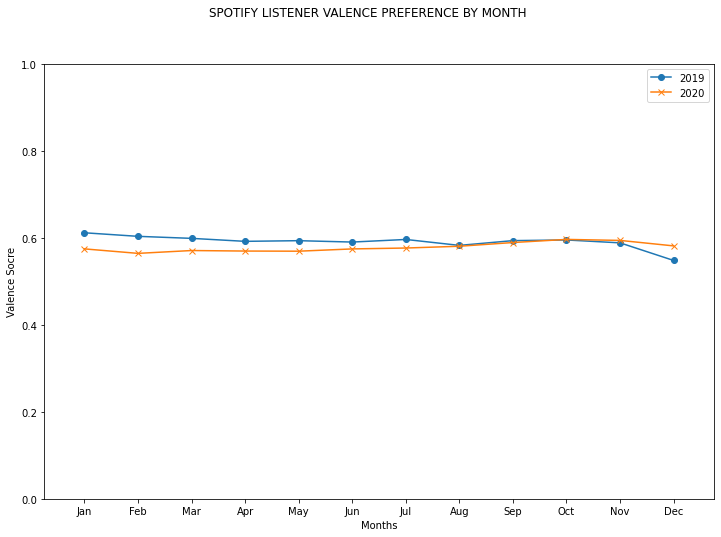

In [165]:
valence_2019 = nz_groupby.loc[nz_groupby['Year'] == 2019]
valence_2020 = nz_groupby.loc[nz_groupby['Year'] == 2020]


fig= plt.figure(figsize=(12,8))
y_axis = valence_2019['Valence']
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x_axis, valence_2019['Valence'], label="2019", marker='o')
plt.plot(x_axis, valence_2020['Valence'], label="2020", marker='x')
plt.xlabel('Months')
plt.ylabel('Valence Socre')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 1)
fig.suptitle('SPOTIFY LISTENER VALENCE PREFERENCE BY MONTH')
plt.legend()

plt.show()


In [201]:

covid_df = pd.read_csv("Resources/owid-covid-data.csv")
#covid_groupby = covid_df.groupby(['location']).count()
#covid_groupby[100:150]
#covid_df

nz_covid_df = covid_df.loc[covid_df['location'] == 'New Zealand']
#covid_df = pd.read_csv("Resources/owid-covid-data.csv")
nz_covid_df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53824,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
53825,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
53826,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
53827,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
53828,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54243,NZL,Oceania,New Zealand,2021-04-22,2600.0,0.0,1.286,26.0,0.0,0.0,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
54244,NZL,Oceania,New Zealand,2021-04-23,2600.0,0.0,1.286,26.0,0.0,0.0,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
54245,NZL,Oceania,New Zealand,2021-04-24,2601.0,1.0,0.857,26.0,0.0,0.0,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
54246,NZL,Oceania,New Zealand,2021-04-25,2601.0,0.0,0.714,26.0,0.0,0.0,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931


In [206]:
#test_nz_covid_df = nz_covid_df.loc[nz_covid_df['date'].str.contains('2020*')]
#test_nz_covid_df

nz_covid_2020_df = nz_covid_df[nz_covid_df.date.str.contains(r'2020.*')]

nz_covid_2020_df['month'] = ''
nz_covid_2020_df

<ipython-input-206-a6499630bcaf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_covid_2020_df['month'] = ''


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
53824,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
53825,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
53826,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
53827,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
53828,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54127,NZL,Oceania,New Zealand,2020-12-27,2144.0,0.0,3.286,25.0,0.0,0.0,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
54128,NZL,Oceania,New Zealand,2020-12-28,2151.0,7.0,4.286,25.0,0.0,0.0,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
54129,NZL,Oceania,New Zealand,2020-12-29,2151.0,0.0,3.286,25.0,0.0,0.0,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,
54130,NZL,Oceania,New Zealand,2020-12-30,2162.0,11.0,4.857,25.0,0.0,0.0,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,


In [220]:
for index, row in nz_covid_2020_df.iterrows():
    month, = re.findall(f"2020-(\d\d)-", row['date'])
    nz_covid_2020_df.at[index, 'month'] = month  
nz_covid_2020_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
53824,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,02
53825,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,02
53826,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03
53827,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03
53828,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931,03


In [227]:
nz_covid_2020_groupby = nz_covid_2020_df.groupby(['month'], as_index=False)['new_cases'].sum()
nz_covid_2020_groupby.loc[-1] = ['01', 0]

nz_covid_2020_groupby.index = nz_covid_2020_groupby.index + 1  # shifting index
nz_covid_2020_groupby = nz_covid_2020_groupby.sort_index()  # sorting by index


nz_covid_2020_groupby

,month,new_cases
0,01,0.0
1,02,1.0
2,03,646.0
3,04,832.0
4,05,25.0
5,06,24.0
6,07,34.0
7,08,190.0
8,09,96.0
9,10,111.0


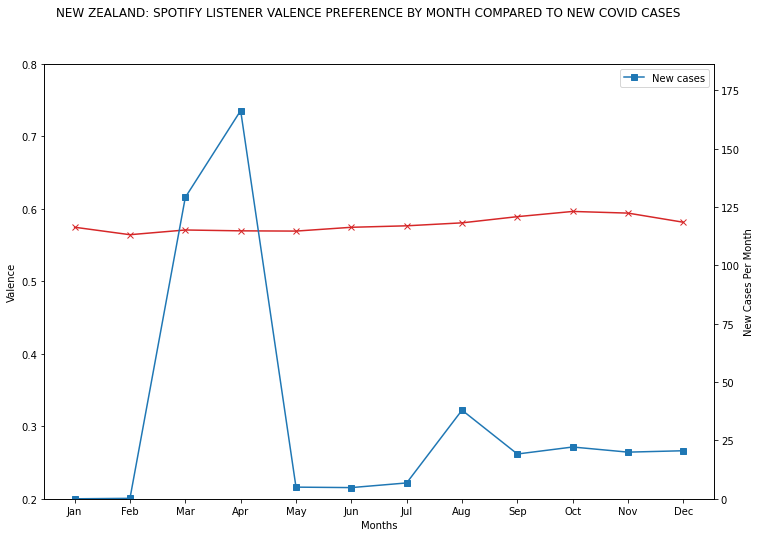

In [262]:
nz_covid_2020_groupby['new_cases_per_million'] = nz_covid_2020_groupby['new_cases'] / 5002100 *1000000
nz_covid_2020_groupby
nz_covid_2020 = nz_covid_2020_groupby['new_cases_per_million']
valence_2019 = nz_groupby.loc[nz_groupby['Year'] == 2019]
valence_2020 = nz_groupby.loc[nz_groupby['Year'] == 2020].reset_index()['Valence']

fig, ax1 = plt.subplots(figsize=(12,8))
#fig= plt.figure(figsize=(12,8))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Valence')
ax1.set_ylim([.2, .8])
ax1.plot(months, valence_2020, label="Valence Scores", marker='x', color=color)                       
                        
ax2 = ax1.twinx() 
ax2.set_ylabel('New Cases Per Month')
ax2.set_ylim([0, nz_covid_2020.max()+20])
ax2.plot(months, nz_covid_2020, label="New cases", marker='s')

fig.suptitle('NEW ZEALAND: SPOTIFY LISTENER VALENCE PREFERENCE BY MONTH COMPARED TO NEW COVID CASES')
plt.legend()

plt.show()


In [263]:
nz_correlation_df = pd.DataFrame({'Valence' : valence_2020, 'New Covid Cases' : nz_covid_2020})
nz_correlation_df

,Valence,New Covid Cases
0,0.574674,0.000000
1,0.564369,0.199916
2,0.570880,129.145759
3,0.569699,166.330141
4,0.569359,4.997901
5,0.574599,4.797985
6,0.576645,6.797145
7,0.580730,37.984047
8,0.589270,19.191939
9,0.596465,22.190680


In [272]:
def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"

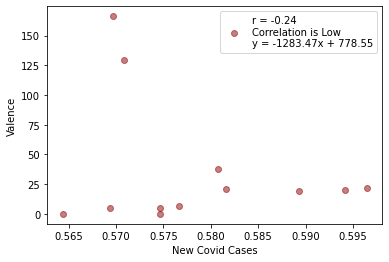

In [274]:
x_axis = nz_correlation_df['Valence']
y_axis = nz_correlation_df['New Covid Cases']


slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

plt.xlabel(f"New Covid Cases")                   # Set x axis label for subplot                  
plt.ylabel(f"Valence")       # Set title for subplot

r = round(stats.pearsonr(x_axis, y_axis)[0],2)              # Calculate correlation coefficient
r_label = r_label(r)                                         # Call function to create a label for the r number

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=.5,     # Plot the scatter chart
label=f"r = {r}\nCorrelation is {r_label}\n{line_eq}")  

plt.legend()                                   # Add the legend
    
#plt.savefig("output_data/weather-conditions-vs-latitude-by-hemisphere.png")        # Save the png file   

plt.show()